In [14]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML

/var/folders/6b/tmvvscrj5wb5r4ngnndf1gtm0000gn/T/ipykernel_68159/2665750577.py:17: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [15]:
# fetch data 

flight_dataset = pd.read_csv('../dataset/merged_data/latter_flight_data.csv')

flight_dataset.head()
len(flight_dataset)

DAY_OF_WEEK MKT_UNIQUE_CARRIER OP_UNIQUE_CARRIER ORIGIN  ARR_DELAY  \
0            6                 WN                WN    MCO     -26.00   
1            6                 UA                OO    ORD     -25.00   
2            6                 B6                B6    MCO      22.00   
3            6                 B6                B6    JFK      36.00   
4            7                 B6                B6    JFK     -12.00   

          SCH_DEP_TIME         SCH_ARR_TIME  ORGIN_WTH_temp  ORGIN_WTH_precip  \
0  2022-01-01 10:30:00  2022-01-01 13:20:00           74.00              0.00   
1  2022-01-01 10:40:00  2022-01-01 13:32:00           36.10              0.00   
2  2022-01-01 13:13:00  2022-01-01 15:56:00           83.00              0.00   
3  2022-01-01 21:45:00  2022-01-01 22:59:00           52.80              0.15   
4  2022-01-02 08:29:00  2022-01-02 09:50:00           52.10              0.00   

   ORGIN_WTH_precipprob  ...  DEST_WTH_temp  DEST_WTH_precip  \
0                     0  ...          48.00             0.00   
1                     0  ...          47.90             0.00   
2                     0  ...          47.70             0.00   
3                   100  ...          37.90             0.02   
4                     0  ...          25.00             0.00   

   DEST_WTH_precipprob  DEST_WTH_snow  DEST_WTH_windspeed  DEST_WTH_winddir  \
0                    0           0.00                3.60              8.00   
1                    0           0.00                0.40            358.00   
2                    0           0.00                7.90            311.00   
3                  100           0.00                6.10            303.00   
4                    0           0.01               13.80            303.00   

   DEST_WTH_cloudcover  DEST_WTH_visibility  DEST_WTH_severerisk  \
0               100.00                 9.80                 3.00   
1               100.00                 9.70                 3.00   
2               100.00                 7.80                 3.00   
3               100.00                 6.80                 3.00   
4               100.00                 1.20                 3.00   

   FORMER_FLIGHT_STATUS  
0                   NaN  
1                   NaN  
2                 early  
3                   NaN  
4                   NaN  

[5 rows x 26 columns]

6773

In [16]:
# Columns used in our dataset
flight_dataset.columns

Index(['DAY_OF_WEEK', 'MKT_UNIQUE_CARRIER', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'ARR_DELAY', 'SCH_DEP_TIME', 'SCH_ARR_TIME', 'ORGIN_WTH_temp',
       'ORGIN_WTH_precip', 'ORGIN_WTH_precipprob', 'ORGIN_WTH_snow',
       'ORGIN_WTH_windspeed', 'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover',
       'ORGIN_WTH_visibility', 'ORGIN_WTH_severerisk', 'DEST_WTH_temp',
       'DEST_WTH_precip', 'DEST_WTH_precipprob', 'DEST_WTH_snow',
       'DEST_WTH_windspeed', 'DEST_WTH_winddir', 'DEST_WTH_cloudcover',
       'DEST_WTH_visibility', 'DEST_WTH_severerisk', 'FORMER_FLIGHT_STATUS'],
      dtype='object')

In [17]:
flight_dataset.dtypes

DAY_OF_WEEK               int64
MKT_UNIQUE_CARRIER       object
OP_UNIQUE_CARRIER        object
ORIGIN                   object
ARR_DELAY               float64
SCH_DEP_TIME             object
SCH_ARR_TIME             object
ORGIN_WTH_temp          float64
ORGIN_WTH_precip        float64
ORGIN_WTH_precipprob      int64
ORGIN_WTH_snow          float64
ORGIN_WTH_windspeed     float64
ORGIN_WTH_winddir       float64
ORGIN_WTH_cloudcover    float64
ORGIN_WTH_visibility    float64
ORGIN_WTH_severerisk    float64
DEST_WTH_temp           float64
DEST_WTH_precip         float64
DEST_WTH_precipprob       int64
DEST_WTH_snow           float64
DEST_WTH_windspeed      float64
DEST_WTH_winddir        float64
DEST_WTH_cloudcover     float64
DEST_WTH_visibility     float64
DEST_WTH_severerisk     float64
FORMER_FLIGHT_STATUS     object
dtype: object

In [18]:
unique_carriers = flight_dataset['MKT_UNIQUE_CARRIER'].unique()
print("Unique values of MKT_UNIQUE_CARRIER:")
for carrier in unique_carriers:
    print(carrier)
    
unique_op_carriers = flight_dataset['OP_UNIQUE_CARRIER'].unique()
print("\nUnique values of OP_UNIQUE_CARRIER:")
for carrier in unique_op_carriers:
    print(carrier)

unique_origins = flight_dataset['ORIGIN'].unique()
print("\nUnique values of ORIGIN:")
for origin in unique_origins:
    print(origin)

unique_origins = flight_dataset['FORMER_FLIGHT_STATUS'].unique()
print("\nUnique values of Former Flight status:")
for origin in unique_origins:
    print(origin)

Unique values of MKT_UNIQUE_CARRIER:
WN
UA
B6
AA
DL

Unique values of OP_UNIQUE_CARRIER:
WN
OO
B6
MQ
9E
G7
PT
YX
UA
ZW

Unique values of ORIGIN:
MCO
ORD
JFK

Unique values of Former Flight status:
nan
early
late
on-time


In [19]:
#Check for NaN values
flight_dataset.isna().sum()
total_nan_count = flight_dataset.isna().sum().sum()
print("Total NaN values in the DataFrame:", total_nan_count)

nan_columns = flight_dataset.columns[flight_dataset.isna().any()].tolist()

for col in nan_columns:
    nan_count = flight_dataset[col].isna().sum()
    print(f"Column '{col}' has {nan_count} NaN values.")

DAY_OF_WEEK                0
MKT_UNIQUE_CARRIER         0
OP_UNIQUE_CARRIER          0
ORIGIN                     0
ARR_DELAY                  0
SCH_DEP_TIME               0
SCH_ARR_TIME               0
ORGIN_WTH_temp             0
ORGIN_WTH_precip           0
ORGIN_WTH_precipprob       0
ORGIN_WTH_snow             0
ORGIN_WTH_windspeed        0
ORGIN_WTH_winddir          0
ORGIN_WTH_cloudcover       0
ORGIN_WTH_visibility       0
ORGIN_WTH_severerisk       0
DEST_WTH_temp              0
DEST_WTH_precip            0
DEST_WTH_precipprob        0
DEST_WTH_snow              0
DEST_WTH_windspeed         0
DEST_WTH_winddir           0
DEST_WTH_cloudcover        0
DEST_WTH_visibility        0
DEST_WTH_severerisk        0
FORMER_FLIGHT_STATUS    2041
dtype: int64

Total NaN values in the DataFrame: 2041
Column 'FORMER_FLIGHT_STATUS' has 2041 NaN values.


In [20]:
#Check the categorical and non-categorical columns
categorical_columns = flight_dataset.select_dtypes(include=['object', 'category']).columns.tolist()
non_categorical_columns = flight_dataset.select_dtypes(exclude=['object', 'category']).columns.tolist()

print("Categorical Columns:")
for col in categorical_columns:
    print("- ", col)

print("\nNon-Categorical Columns:")
for col in non_categorical_columns:
    print("- ", col)

Categorical Columns:
-  MKT_UNIQUE_CARRIER
-  OP_UNIQUE_CARRIER
-  ORIGIN
-  SCH_DEP_TIME
-  SCH_ARR_TIME
-  FORMER_FLIGHT_STATUS

Non-Categorical Columns:
-  DAY_OF_WEEK
-  ARR_DELAY
-  ORGIN_WTH_temp
-  ORGIN_WTH_precip
-  ORGIN_WTH_precipprob
-  ORGIN_WTH_snow
-  ORGIN_WTH_windspeed
-  ORGIN_WTH_winddir
-  ORGIN_WTH_cloudcover
-  ORGIN_WTH_visibility
-  ORGIN_WTH_severerisk
-  DEST_WTH_temp
-  DEST_WTH_precip
-  DEST_WTH_precipprob
-  DEST_WTH_snow
-  DEST_WTH_windspeed
-  DEST_WTH_winddir
-  DEST_WTH_cloudcover
-  DEST_WTH_visibility
-  DEST_WTH_severerisk


Index(['DAY_OF_WEEK', 'MKT_UNIQUE_CARRIER', 'OP_UNIQUE_CARRIER', 'ORIGIN',
       'ARR_DELAY', 'SCH_DEP_TIME', 'SCH_ARR_TIME', 'ORGIN_WTH_temp',
       'ORGIN_WTH_precip', 'ORGIN_WTH_precipprob', 'ORGIN_WTH_snow',
       'ORGIN_WTH_windspeed', 'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover',
       'ORGIN_WTH_visibility', 'ORGIN_WTH_severerisk', 'DEST_WTH_temp',
       'DEST_WTH_precip', 'DEST_WTH_precipprob', 'DEST_WTH_snow',
       'DEST_WTH_windspeed', 'DEST_WTH_winddir', 'DEST_WTH_cloudcover',
       'DEST_WTH_visibility', 'DEST_WTH_severerisk', 'FORMER_FLIGHT_STATUS'],
      dtype='object')


<Axes: >

DAY_OF_WEEK


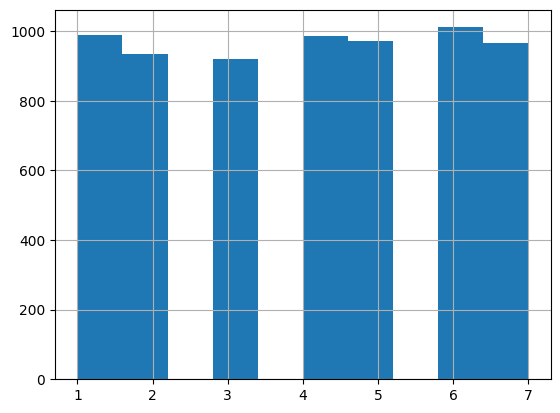

<Axes: >

MKT_UNIQUE_CARRIER


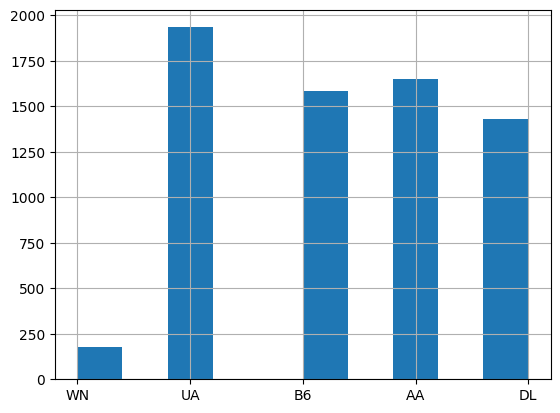

<Axes: >

OP_UNIQUE_CARRIER


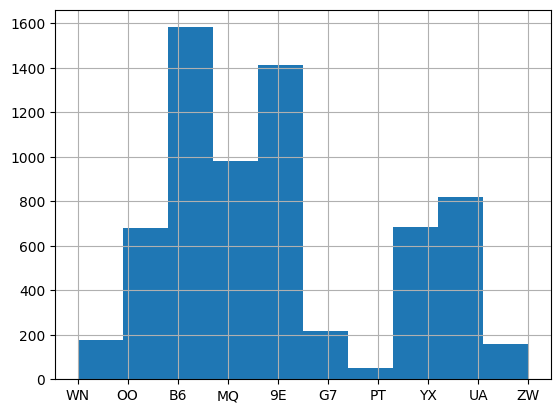

<Axes: >

ORIGIN


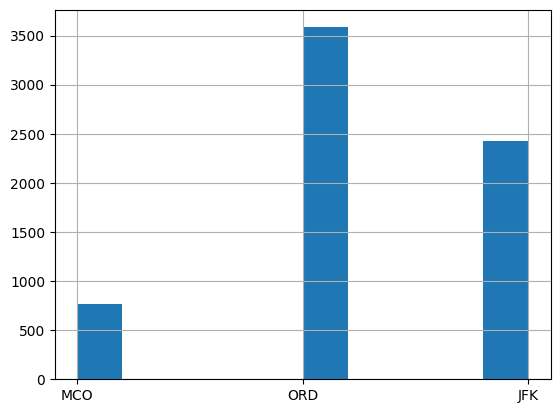

<Axes: >

ARR_DELAY


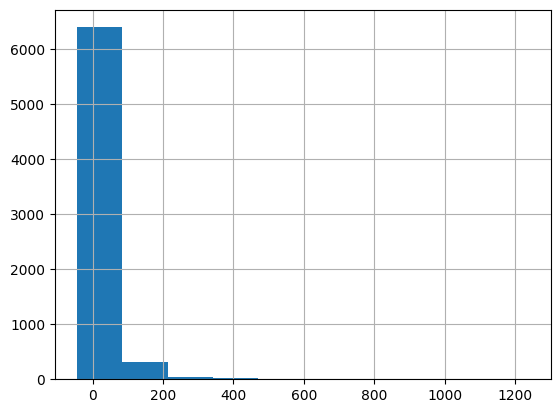

<Axes: >

SCH_DEP_TIME


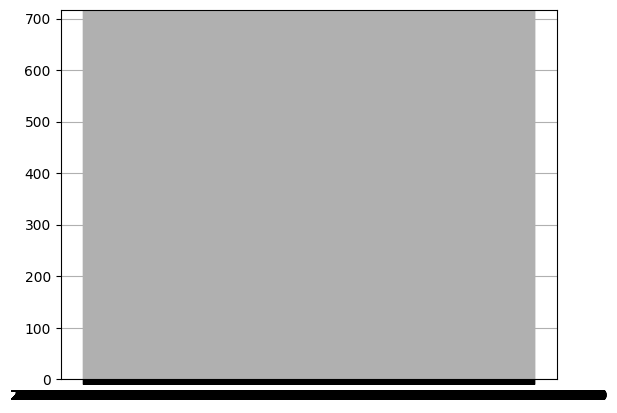

<Axes: >

SCH_ARR_TIME


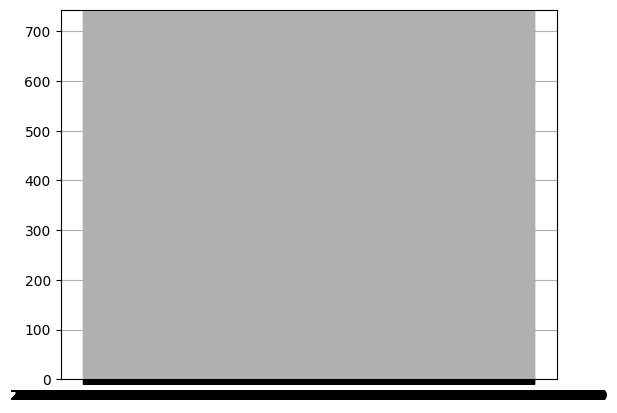

<Axes: >

ORGIN_WTH_temp


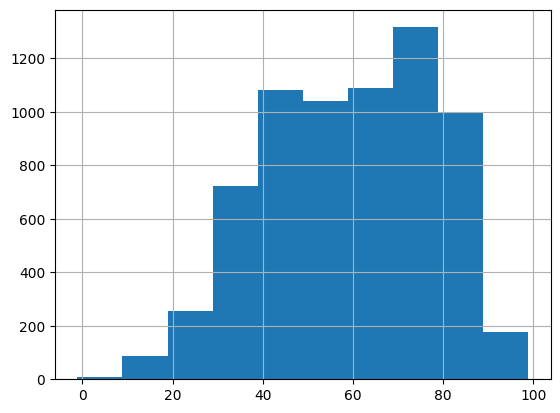

<Axes: >

ORGIN_WTH_precip


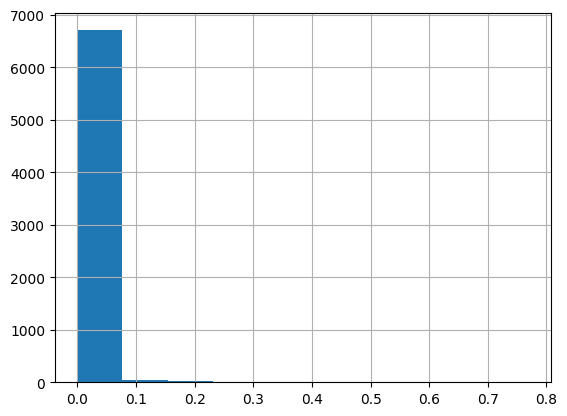

<Axes: >

ORGIN_WTH_precipprob


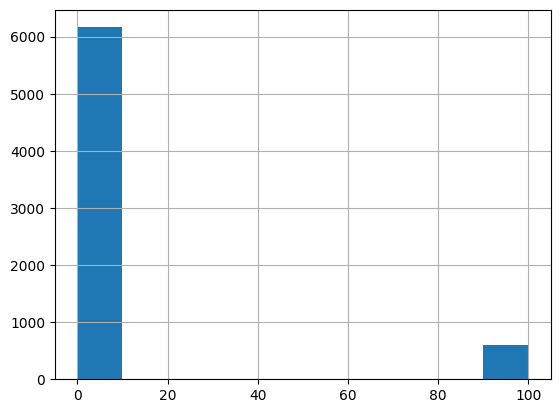

<Axes: >

ORGIN_WTH_snow


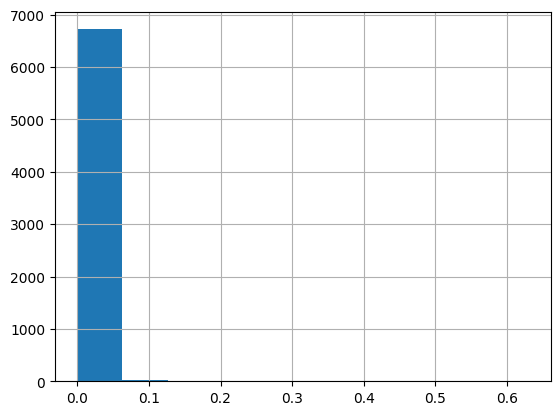

<Axes: >

ORGIN_WTH_windspeed


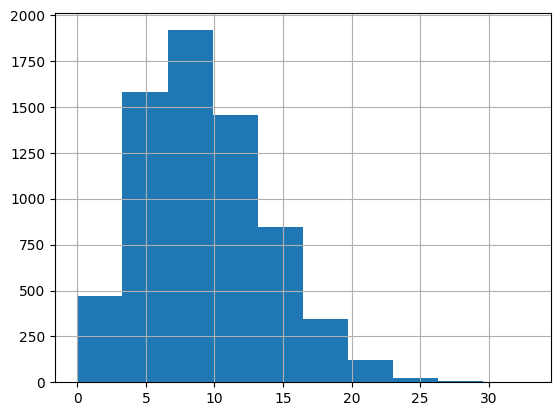

<Axes: >

ORGIN_WTH_winddir


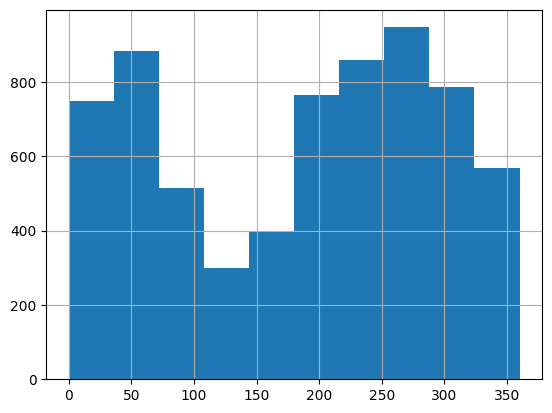

<Axes: >

ORGIN_WTH_cloudcover


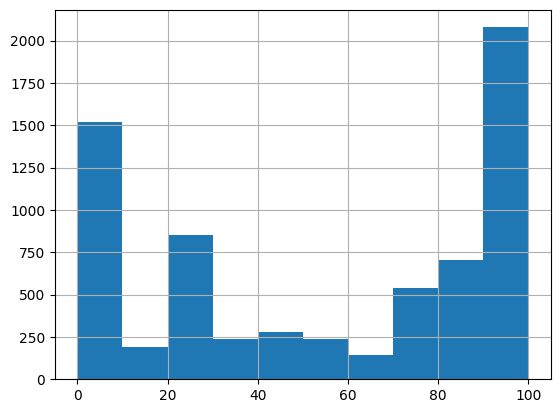

<Axes: >

ORGIN_WTH_visibility


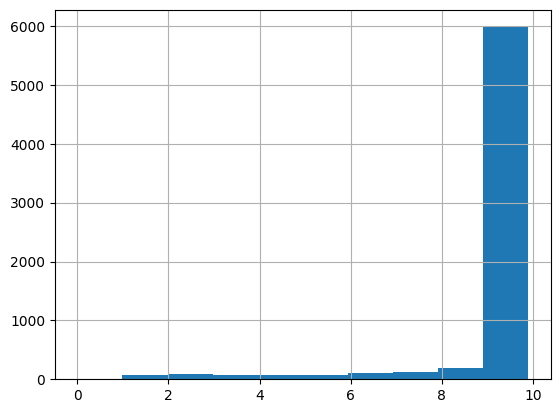

<Axes: >

ORGIN_WTH_severerisk


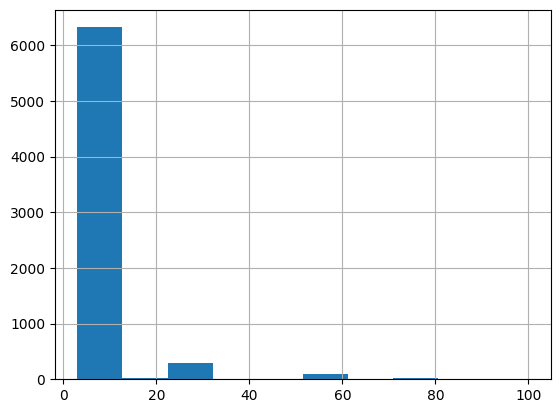

<Axes: >

DEST_WTH_temp


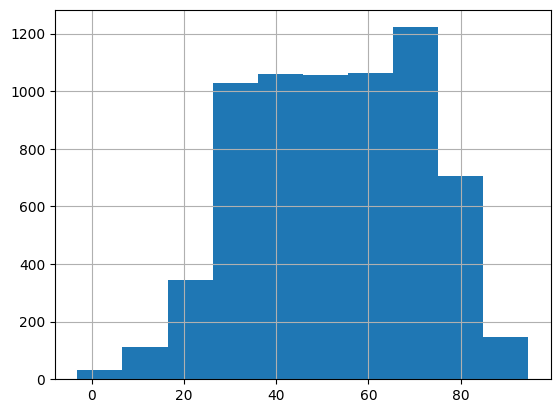

<Axes: >

DEST_WTH_precip


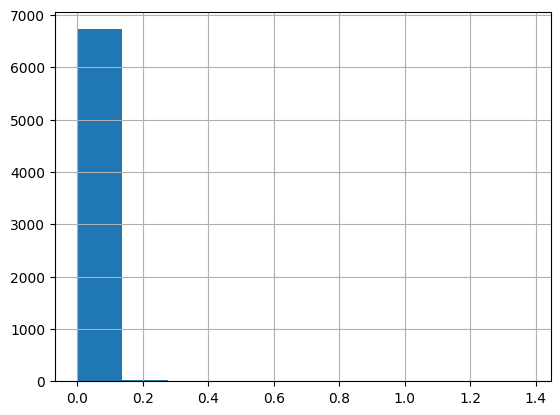

<Axes: >

DEST_WTH_precipprob


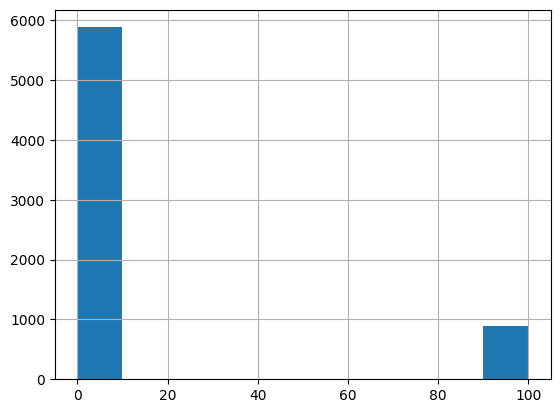

<Axes: >

DEST_WTH_snow


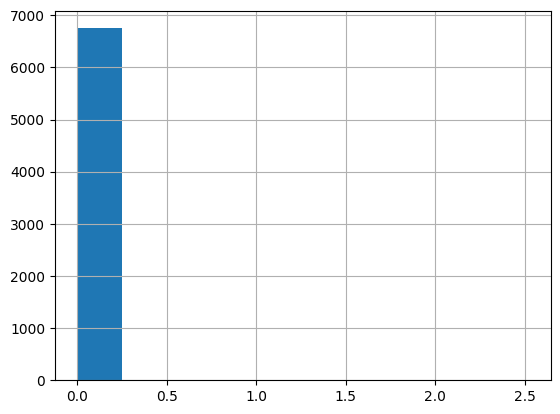

<Axes: >

DEST_WTH_windspeed


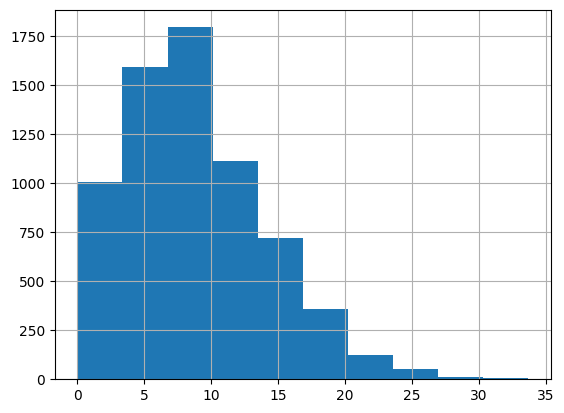

<Axes: >

DEST_WTH_winddir


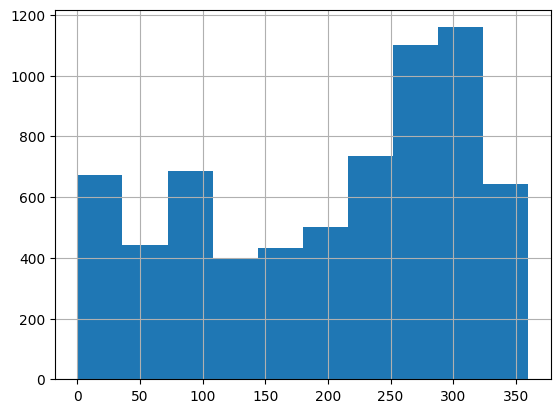

<Axes: >

DEST_WTH_cloudcover


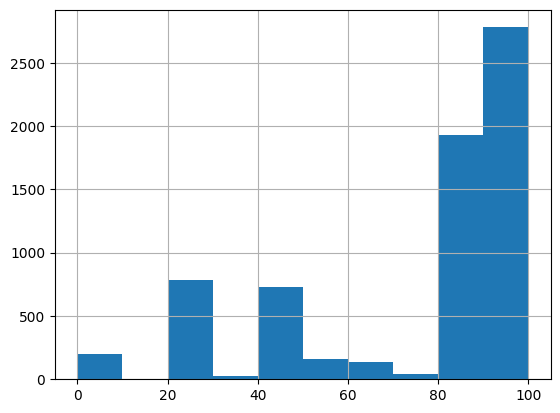

<Axes: >

DEST_WTH_visibility


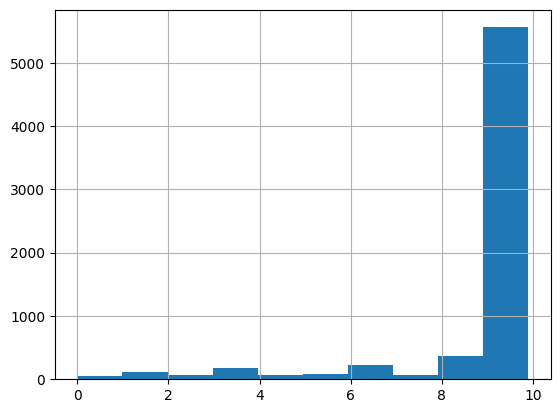

<Axes: >

DEST_WTH_severerisk


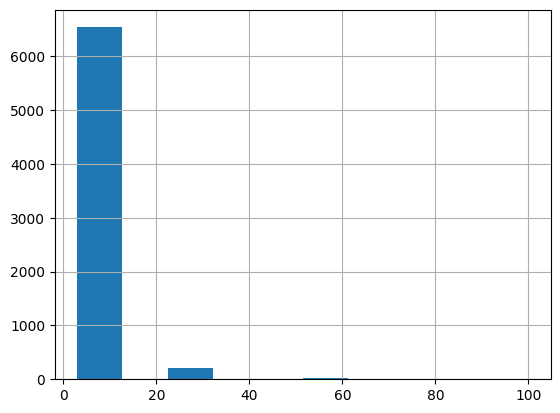

<Axes: >

FORMER_FLIGHT_STATUS


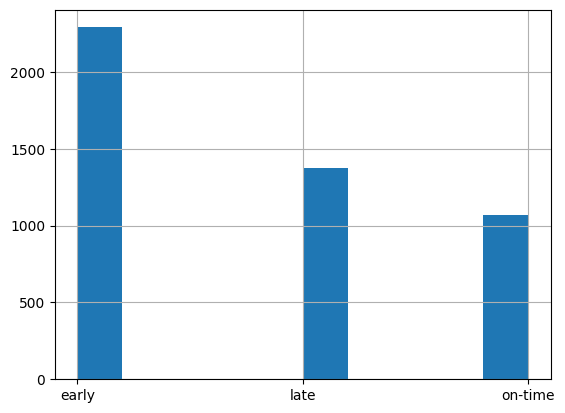

In [21]:
#Histogram
cols = flight_dataset.columns
print(cols)
for col in cols: 
    flight_dataset[col].hist()
    print(col)
    plt.show()

In [22]:
# define function to import viz libraries
import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns

In [23]:
# Function to visualize by features
def visualize_by_features(list_of_features, y_col):
    for x_col in list_of_features:
        plot_data = []
        df_plot = flight_dataset[[x_col, y_col]].sort_values(by=x_col)
        plot_data.append(go.Scatter(x= df_plot[x_col], y= df_plot[y_col], 
                         name = 'feature = {}'.format(x_col), mode = 'markers' ))

        layout = go.Layout(xaxis = dict(title=x_col), yaxis = dict(title= y_col), 
                           title = 'Data for {}'.format(y_col))
        fig = go.Figure(data= plot_data, layout=layout)
        plotly.offline.iplot(fig)

In [25]:
visualize_by_features(['DAY_OF_WEEK', 'ORGIN_WTH_temp', 'ORGIN_WTH_precip', 'ORGIN_WTH_precipprob', 'ORGIN_WTH_snow', 'ORGIN_WTH_windspeed', 'ORGIN_WTH_winddir', 'ORGIN_WTH_cloudcover', 'ORGIN_WTH_visibility', 'ORGIN_WTH_severerisk', 'DEST_WTH_temp', 'DEST_WTH_precip', 'DEST_WTH_precipprob', 'DEST_WTH_snow', 'DEST_WTH_windspeed', 'DEST_WTH_winddir', 'DEST_WTH_cloudcover', 'DEST_WTH_visibility', 'DEST_WTH_severerisk'], 'ARR_DELAY')

In [26]:
#Heatmap to find the feature with highest correlation with price

import plotly
plotly.offline.init_notebook_mode(connected=True)
from plotly.graph_objs import *
from plotly import tools
import plotly.graph_objects as go
import seaborn as sns
import plotly.offline as pyo

# Exclude non-numeric columns before calculating correlation
numeric_df = flight_dataset.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correl = numeric_df.corr()

# Create a heatmap trace
trace = go.Heatmap(z=correl.values,
                  x=correl.index.values,
                  y=correl.columns.values)

# Create a list of traces
data = [trace]

# Create layout
layout = go.Layout(title='Correlation Heatmap')

# Create figure
fig = go.Figure(data=data, layout=layout)

# Display the heatmap
pyo.iplot(fig)

In [27]:
# Get unique values for origin and airline
unique_origins = flight_dataset['ORIGIN'].unique()
unique_airlines = flight_dataset['MKT_UNIQUE_CARRIER'].unique()

# Iterate over all combinations of origin and airline
for origin in unique_origins:
    for airline in unique_airlines:
        # Filter the DataFrame based on the current origin and airline
        filtered_data = flight_dataset[(flight_dataset['ORIGIN'] == origin) & (flight_dataset['MKT_UNIQUE_CARRIER'] == airline)]
        
        # Calculate the average ARR_DELAY
        average_arr_delay = filtered_data['ARR_DELAY'].mean()
        
        # Print the result
        print(f"The average ARR_DELAY for flights from {origin} with airline {airline} is: {average_arr_delay}")


The average ARR_DELAY for flights from MCO with airline WN is: 4.308988764044944
The average ARR_DELAY for flights from MCO with airline UA is: nan
The average ARR_DELAY for flights from MCO with airline B6 is: 34.483760683760686
The average ARR_DELAY for flights from MCO with airline AA is: nan
The average ARR_DELAY for flights from MCO with airline DL is: nan
The average ARR_DELAY for flights from ORD with airline WN is: nan
The average ARR_DELAY for flights from ORD with airline UA is: 6.992757371960683
The average ARR_DELAY for flights from ORD with airline B6 is: nan
The average ARR_DELAY for flights from ORD with airline AA is: 6.04603270745003
The average ARR_DELAY for flights from ORD with airline DL is: nan
The average ARR_DELAY for flights from JFK with airline WN is: nan
The average ARR_DELAY for flights from JFK with airline UA is: nan
The average ARR_DELAY for flights from JFK with airline B6 is: 22.067201604814443
The average ARR_DELAY for flights from JFK with airline AA

<Axes: xlabel='ORIGIN'>

Text(0.5, 1.0, 'Average ARR_DELAY by Origin and Airline')

Text(0.5, 0, 'Origin')

Text(0, 0.5, 'Average ARR_DELAY')

(array([0, 1, 2]), [Text(0, 0, 'JFK'), Text(1, 0, 'MCO'), Text(2, 0, 'ORD')])

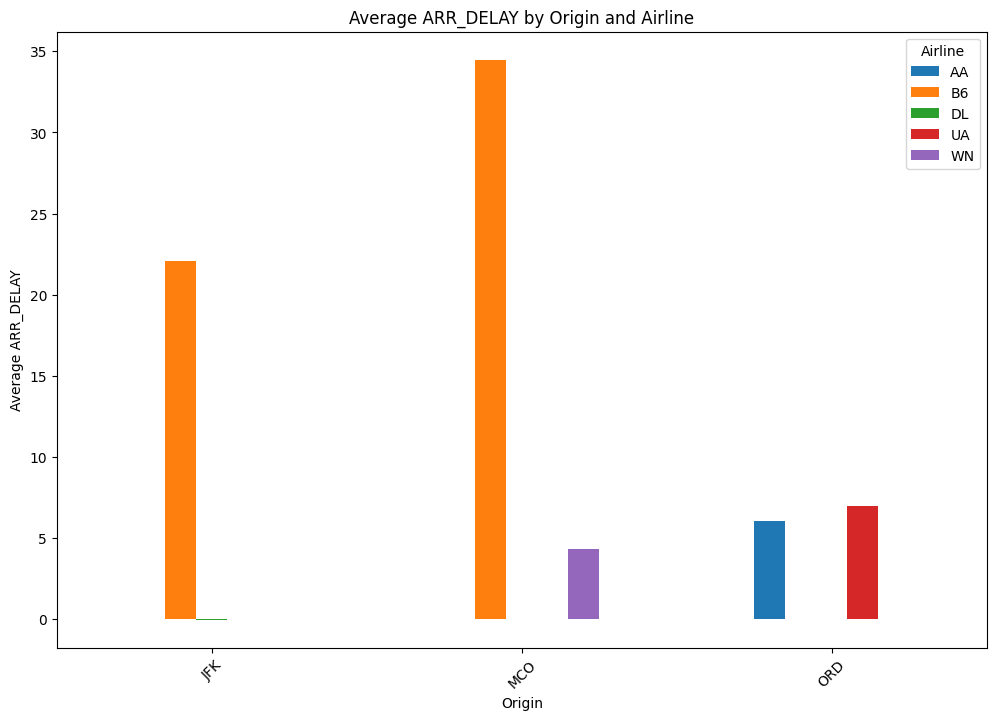

In [28]:
import matplotlib.pyplot as plt

# Group the data by origin and airline, then calculate average ARR_DELAY
grouped_data = flight_dataset.groupby(['ORIGIN', 'MKT_UNIQUE_CARRIER'])['ARR_DELAY'].mean().unstack()

# Create the clustered bar chart
grouped_data.plot(kind='bar', figsize=(12, 8))
plt.title('Average ARR_DELAY by Origin and Airline')
plt.xlabel('Origin')
plt.ylabel('Average ARR_DELAY')
plt.xticks(rotation=45)
plt.legend(title='Airline')
plt.show()


In [29]:
# Group the data by origin and calculate the average ARR_DELAY for each origin
average_delay_by_origin = flight_dataset.groupby('ORIGIN')['ARR_DELAY'].mean()

# Print the result
print("Average delay from each origin for all airlines:")
print(average_delay_by_origin)


Average delay from each origin for all airlines:
ORIGIN
JFK    9.04
MCO   27.44
ORD    6.56
Name: ARR_DELAY, dtype: float64


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='ORIGIN'>

Text(0.5, 1.0, 'Average Delay from Each Origin for All Airlines')

Text(0.5, 0, 'Origin')

Text(0, 0.5, 'Average Delay')

(array([0, 1, 2]), [Text(0, 0, 'JFK'), Text(1, 0, 'MCO'), Text(2, 0, 'ORD')])

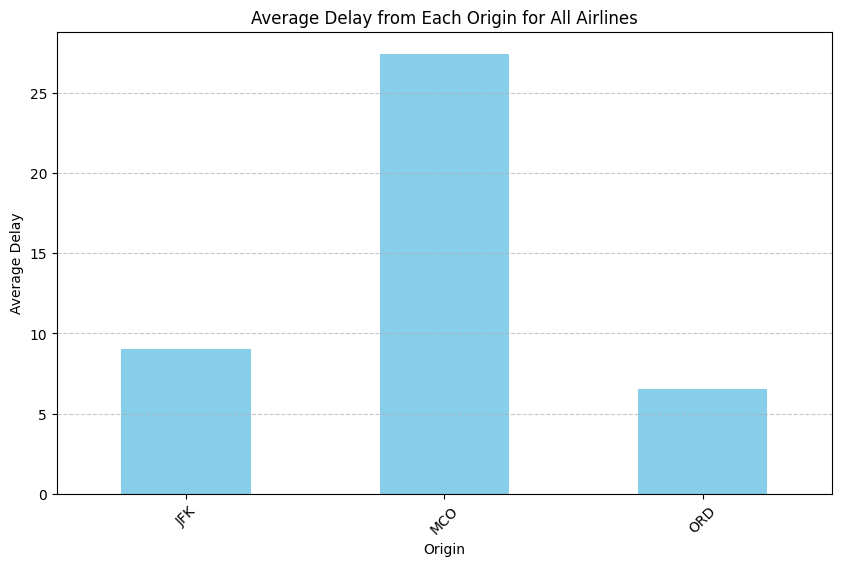

In [30]:
import matplotlib.pyplot as plt

# Group the data by origin and calculate the average ARR_DELAY for each origin
average_delay_by_origin = flight_dataset.groupby('ORIGIN')['ARR_DELAY'].mean()

# Create a clustered bar chart
plt.figure(figsize=(10, 6))
average_delay_by_origin.plot(kind='bar', color='skyblue')
plt.title('Average Delay from Each Origin for All Airlines')
plt.xlabel('Origin')
plt.ylabel('Average Delay')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Arrival Delay vs. Former Flight Status')

Text(0.5, 0, 'Flight Index')

Text(0, 0.5, 'Arrival Delay')

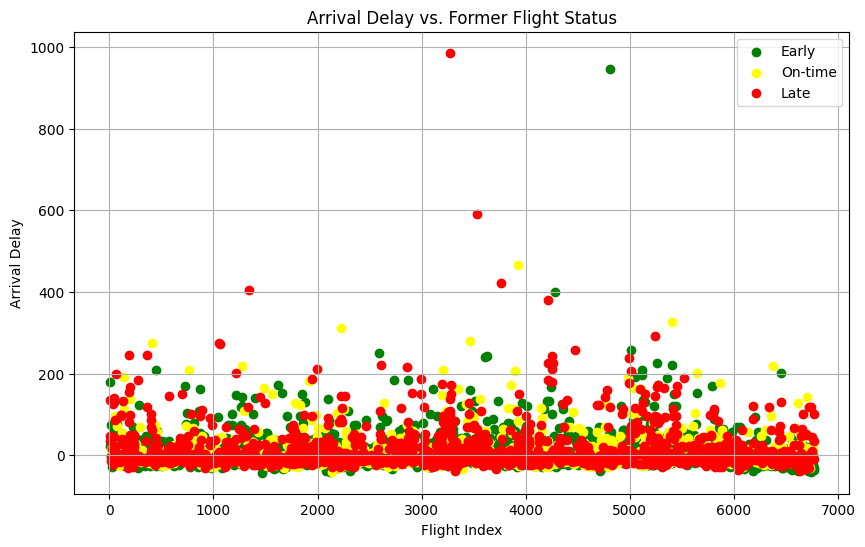

Text(0.5, 1.0, 'Arrival Delay vs. Former Flight Status')

Text(0.5, 0, 'Flight Index')

Text(0, 0.5, 'Arrival Delay')

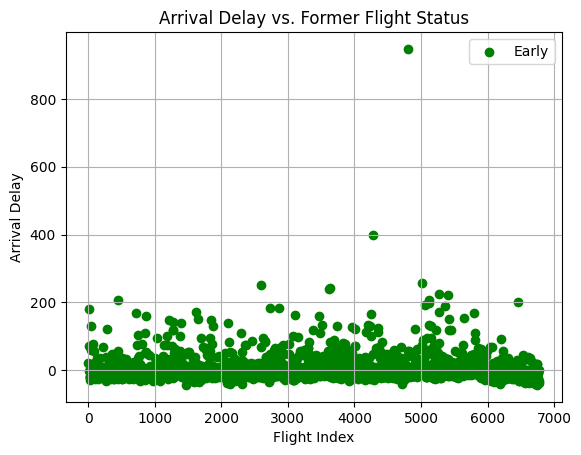

Text(0.5, 1.0, 'Arrival Delay vs. Former Flight Status')

Text(0.5, 0, 'Flight Index')

Text(0, 0.5, 'Arrival Delay')

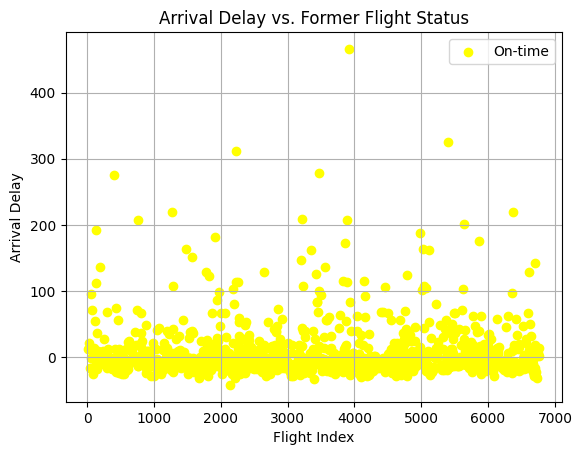

Text(0.5, 1.0, 'Arrival Delay vs. Former Flight Status')

Text(0.5, 0, 'Flight Index')

Text(0, 0.5, 'Arrival Delay')

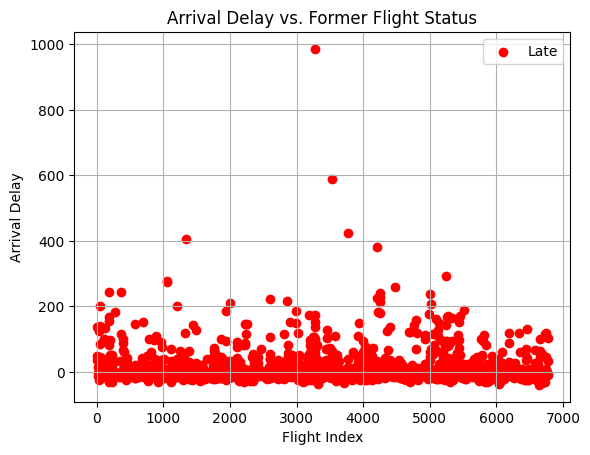

In [31]:
import matplotlib.pyplot as plt

# Filter flights based on former flight status
early_flights = flight_dataset[flight_dataset['FORMER_FLIGHT_STATUS'] == 'early']
on_time_flights = flight_dataset[flight_dataset['FORMER_FLIGHT_STATUS'] == 'on-time']
late_flights = flight_dataset[flight_dataset['FORMER_FLIGHT_STATUS'] == 'late']

# Plot the arrival delay for each flight category
plt.figure(figsize=(10, 6))

# Plot early flights
plt.scatter(early_flights.index, early_flights['ARR_DELAY'], color='green', label='Early')

# Plot on-time flights
plt.scatter(on_time_flights.index, on_time_flights['ARR_DELAY'], color='yellow', label='On-time')

# Plot late flights
plt.scatter(late_flights.index, late_flights['ARR_DELAY'], color='red', label='Late')

# Add labels and legend
plt.title('Arrival Delay vs. Former Flight Status')
plt.xlabel('Flight Index')
plt.ylabel('Arrival Delay')
plt.legend()
plt.grid(True)
plt.show()


# Plot early flights
plt.scatter(early_flights.index, early_flights['ARR_DELAY'], color='green', label='Early')
# Add labels and legend
plt.title('Arrival Delay vs. Former Flight Status')
plt.xlabel('Flight Index')
plt.ylabel('Arrival Delay')
plt.legend()
plt.grid(True)
plt.show()

# Plot on-time flights
plt.scatter(on_time_flights.index, on_time_flights['ARR_DELAY'], color='yellow', label='On-time')
# Add labels and legend
plt.title('Arrival Delay vs. Former Flight Status')
plt.xlabel('Flight Index')
plt.ylabel('Arrival Delay')
plt.legend()
plt.grid(True)
plt.show()

# Plot late flights
plt.scatter(late_flights.index, late_flights['ARR_DELAY'], color='red', label='Late')
# Add labels and legend
plt.title('Arrival Delay vs. Former Flight Status')
plt.xlabel('Flight Index')
plt.ylabel('Arrival Delay')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='FORMER_FLIGHT_STATUS'>

Text(0.5, 1.0, 'Mean Arrival Delay by Former Flight Status')

Text(0.5, 0, 'Former Flight Status')

Text(0, 0.5, 'Mean Arrival Delay')

(array([0, 1, 2]),
 [Text(0, 0, 'early'), Text(1, 0, 'late'), Text(2, 0, 'on-time')])

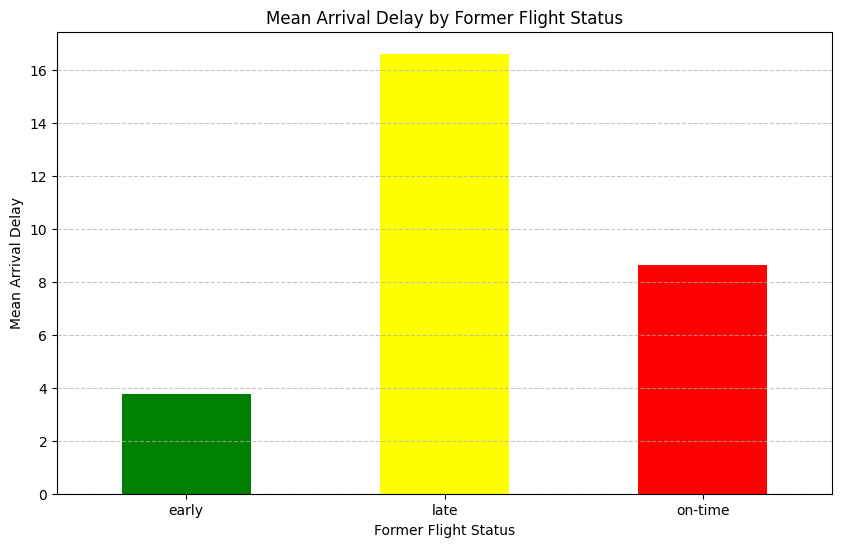

In [32]:
import matplotlib.pyplot as plt

# Group flights by former flight status and calculate mean arrival delay for each category
grouped_data = flight_dataset.groupby('FORMER_FLIGHT_STATUS')['ARR_DELAY'].mean()

# Plot the clustered bar chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title('Mean Arrival Delay by Former Flight Status')
plt.xlabel('Former Flight Status')
plt.ylabel('Mean Arrival Delay')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
# Calculate the median arrival delay
median_arr_delay = flight_dataset['ARR_DELAY'].median()

# Print the median arrival delay
print("Median Arrival Delay:", median_arr_delay)

Median Arrival Delay: -4.0


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='FORMER_FLIGHT_STATUS'>

Text(0.5, 1.0, 'Median Arrival Delay by Former Flight Status')

Text(0.5, 0, 'Former Flight Status')

Text(0, 0.5, 'Median Arrival Delay')

(array([0, 1, 2]),
 [Text(0, 0, 'early'), Text(1, 0, 'late'), Text(2, 0, 'on-time')])

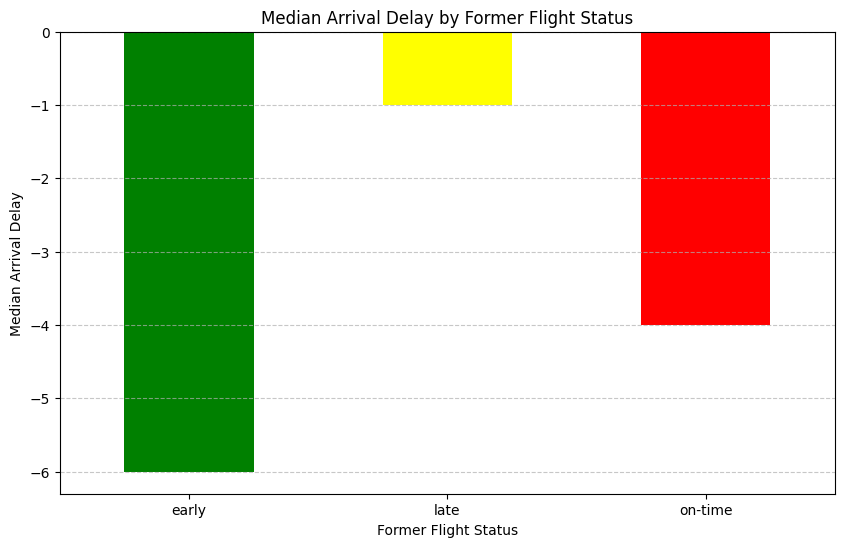

In [34]:
import matplotlib.pyplot as plt

# Group flights by former flight status and calculate median arrival delay for each category
median_arrival_delay_by_status = flight_dataset.groupby('FORMER_FLIGHT_STATUS')['ARR_DELAY'].median()

# Plot the bar chart
plt.figure(figsize=(10, 6))
median_arrival_delay_by_status.plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title('Median Arrival Delay by Former Flight Status')
plt.xlabel('Former Flight Status')
plt.ylabel('Median Arrival Delay')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Median Arrival Delay by Former Flight Status')

Text(0.5, 0, 'Former Flight Status')

Text(0, 0.5, 'Median Arrival Delay')

([0, 1, 2], [Text(0, 0, 'early'), Text(1, 0, 'late'), Text(2, 0, 'on-time')])

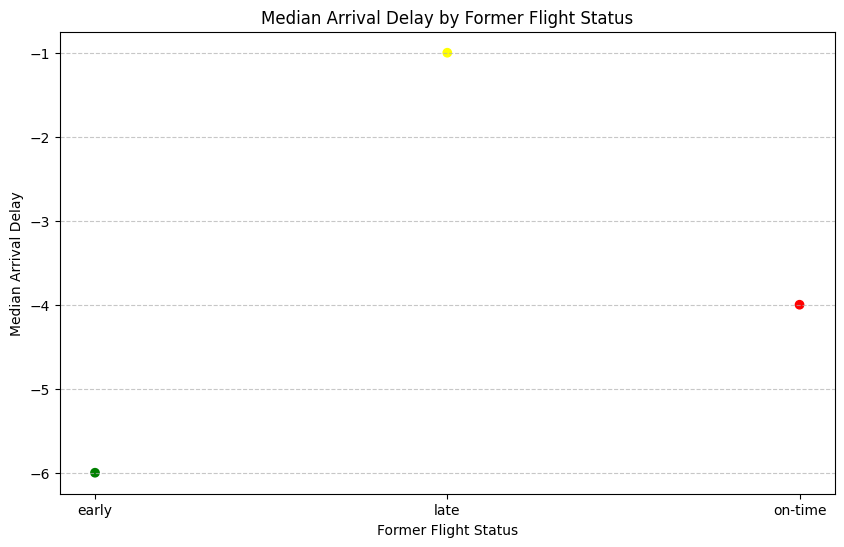

In [35]:
import matplotlib.pyplot as plt

# Group flights by former flight status and calculate median arrival delay for each category
median_arrival_delay_by_status = flight_dataset.groupby('FORMER_FLIGHT_STATUS')['ARR_DELAY'].median()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(median_arrival_delay_by_status.index, median_arrival_delay_by_status.values, color=['green', 'yellow', 'red'])
plt.title('Median Arrival Delay by Former Flight Status')
plt.xlabel('Former Flight Status')
plt.ylabel('Median Arrival Delay')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
